In [3]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC']

# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2000-01-01'
end_date = '2016-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

In [5]:
panel_data

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 4277 (major_axis) x 3 (minor_axis)
Items axis: Open to Adj Close
Major_axis axis: 2000-01-03 00:00:00 to 2016-12-30 00:00:00
Minor_axis axis: AAPL to ^GSPC

In [6]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
adj_close = panel_data.ix['Adj Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex adj_close using all_weekdays as the new index
adj_close = adj_close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
adj_close = adj_close.fillna(method='ffill')

In [7]:
all_weekdays

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=4435, freq='B')

In [8]:
adj_close.head(7)

,AAPL,MSFT,^GSPC
2000-01-03,3.625643,39.334630,1455.219971
2000-01-04,3.319964,38.005900,1399.420044
2000-01-05,3.368548,38.406628,1402.109985
2000-01-06,3.077039,37.120080,1403.449951
2000-01-07,3.222794,37.605172,1441.469971
2000-01-10,3.166112,37.879354,1457.599976
2000-01-11,3.004162,36.909170,1438.560059


In [9]:
adj_close.describe()

,AAPL,MSFT,^GSPC
count,4435.000000,4435.000000,4435.000000
mean,35.475307,26.150908,1375.881598
std,38.239154,10.452976,361.308452
min,0.849911,12.306545,676.530029
25%,3.241014,19.384550,1126.334961
50%,17.631760,22.494373,1294.869995
75%,65.054443,27.409396,1507.724976
max,127.966091,63.236627,2271.719971


In [10]:
# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date.
msft = adj_close.ix[:, 'MSFT']
# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

In [11]:
# Plot everything by leveraging the very powerful matplotlib package
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

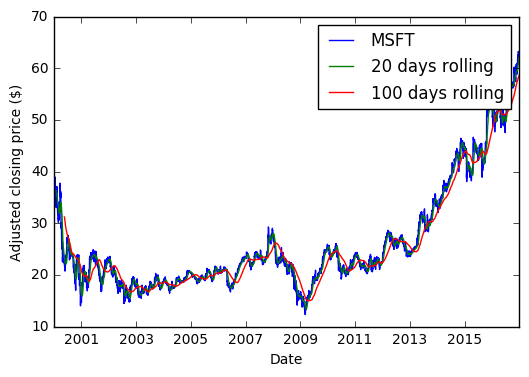

In [12]:
plt.show()